In [2]:
import os
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray
from bing_image_downloader import downloader
import random

In [4]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from 'e:\\softwares\\anaconda\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


In [3]:
personalities = os.listdir('images')[0:3]
personalities

['Angelina Jolie', 'Nicole Kidman', 'Tom Hanks']

In [5]:
import os
for i in personalities:
    arr = os.listdir('images/'+ i)
    for j in range(len(arr)):
        old_name = 'D:/projects/tutorials/AI_industry course/images/{}/{}'.format(i,arr[j])#old name of image
        new_name = 'D:/projects/tutorials/AI_industry course/images/{}/{}'.format(i,"{}.jpg".format(j))#numbers
        print(new_name)
        os.rename(old_name, new_name)

D:/projects/tutorials/AI_industry course/images/Angelina Jolie/0.jpg


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:/projects/tutorials/AI_industry course/images/Angelina Jolie/0.jpg' -> 'D:/projects/tutorials/AI_industry course/images/Angelina Jolie/0.jpg'

In [7]:
image_set = {}
limit = 100
for i in personalities:
    j=0
    image_set[i] = [None]*limit
    for k in os.listdir('images/{}'.format(i)):
        print(k)
        if j<limit:
            image_set[i][j] = imread('E:/programming/collections/tutorials/AI_industry course/AI_for_robotics_miniproject/images/{}/{}'.format(i,k))#reading the images and converting it to array
            j+=1
        else:
            break

0.jpg
1.jpg
10.jpg
11.jpg
12.jpg
13.jpg
14.jpg
15.jpg
16.jpg
17.jpg
18.jpg
19.jpg
2.jpg
20.jpg
21.jpg
22.jpg
23.jpg
24.jpg
25.jpg
26.jpg
27.jpg
28.jpg
29.jpg
3.jpg
30.jpg
31.jpg
32.jpg
33.jpg
34.jpg
35.jpg
36.jpg
37.jpg
38.jpg
39.jpg
4.jpg
40.jpg
41.jpg
42.jpg
43.jpg
44.jpg
45.jpg
46.jpg
47.jpg
48.jpg
49.jpg
5.jpg
50.jpg
51.jpg
52.jpg
53.jpg
54.jpg
55.jpg
56.jpg
57.jpg
58.jpg
59.jpg
6.jpg
60.jpg
61.jpg
62.jpg
63.jpg
64.jpg
65.jpg
66.jpg
67.jpg
68.jpg
69.jpg
7.jpg
70.jpg
71.jpg
72.jpg
73.jpg
74.jpg
75.jpg
76.jpg
77.jpg
78.jpg
79.jpg
8.jpg
80.jpg
81.jpg
82.jpg
83.jpg
84.jpg
85.jpg
86.jpg
87.jpg
88.jpg
89.jpg
9.jpg
90.jpg
91.jpg
92.jpg
93.jpg
94.jpg
95.jpg
96.jpg
97.jpg
98.jpg
99.jpg
0.jpg
1.jpg
10.jpg
11.jpg
12.jpg
13.jpg
14.jpg
15.jpg
16.jpg
17.jpg
18.jpg
19.jpg
2.jpg
20.jpg
21.jpg
22.jpg
23.jpg
24.jpg
25.jpg
26.jpg
27.jpg
28.jpg
29.jpg
3.jpg
30.jpg
31.jpg
32.jpg
33.jpg
34.jpg
35.jpg
36.jpg
37.jpg
38.jpg
39.jpg
4.jpg
40.jpg
41.jpg
42.jpg
43.jpg
44.jpg
45.jpg
46.jpg
47.jpg
48.jpg
49.jpg


In [8]:
len(image_set[random.choice(personalities)])

100

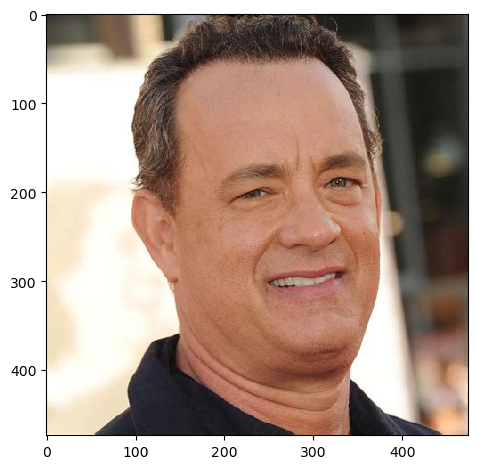

In [9]:
imshow(image_set[random.choice(personalities)][8])

In [10]:
image_set_gray = {}
limit = 100
for i in personalities:
    j=0
    image_set_gray[i] = [None]*limit
    for k in os.listdir('images/{}'.format(i)):
        if j<limit:
            try:
                image_set_gray[i][j] = rgb2gray(image_set[i][j][:,:,0:3])#all the images saved as array will be converted to gray scale
            except:
                pass
            j+=1
        else:
            break
    print(i,":",len(image_set_gray[i]))

Angelina Jolie : 100
Nicole Kidman : 100
Tom Hanks : 100


In [11]:
for i in personalities:
    for j in range(100):
            image_set_gray[i][j] = resize(image_set_gray[i][j], (350,350))

In [12]:
len_of_images = {}
for i in personalities:
    len_of_images[i] = len(image_set_gray[i])
len_of_images

{'Angelina Jolie': 100, 'Nicole Kidman': 100, 'Tom Hanks': 100}

In [13]:
image_size = {}
for i in personalities:
    image_size[i] = image_set_gray[i][0].shape
image_size

{'Angelina Jolie': (350, 350),
 'Nicole Kidman': (350, 350),
 'Tom Hanks': (350, 350)}

In [14]:
flat = image_size[random.choice(personalities)][0]*image_size[random.choice(personalities)][1]

In [15]:
for i in personalities:
    for j in range(len_of_images[i]):
        image_set_gray[i][j] = np.ndarray.flatten(image_set_gray[i][j]).reshape(flat,1)

In [16]:
for i in personalities:
    image_set_gray[i] = np.dstack(image_set_gray[i])

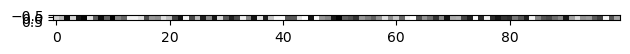

In [17]:
imshow(image_set_gray[random.choice(personalities)][1])

In [18]:
for i in personalities:
    image_set_gray[i] = np.rollaxis(image_set_gray[i],axis=2,start=0)

In [19]:
image_set_gray[random.choice(personalities)].shape

(100, 122500, 1)

In [20]:
for i in personalities:
    image_set_gray[i] = image_set_gray[i].reshape(len_of_images[i],flat)

In [21]:
dataframeset = {}
for i in personalities:
    dataframeset[i] = pd.DataFrame(image_set_gray[i])

In [22]:
for i in personalities:
    dataframeset[i]['label'] = i

In [23]:
actor_final = pd.DataFrame()
for i in personalities:
    actor_final = pd.concat([actor_final,dataframeset[i]])

In [30]:
actor_final.label.unique()

array(['Angelina Jolie', 'Nicole Kidman', 'Tom Hanks'], dtype=object)

In [25]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import pandas as pd




In [48]:
CSV_COLUMN_NAMES = list(actor_final.columns.values)
print(type(column_headers[-1]))

<class 'str'>


In [64]:
actor_final.columns = actor_final.columns.astype(str)

In [65]:
actor_final.columns.map(type)

Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>,
       ...
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>],
      dtype='object', length=122501)

In [66]:
test = actor_final.iloc[70:,:]
train = actor_final.iloc[:70,:]

In [67]:
train

,0,1,2,3,4,5,6,7,8,9,...,122491,122492,122493,122494,122495,122496,122497,122498,122499,label
0,0.837898,0.824412,0.816680,0.821093,0.822481,0.820211,0.819987,0.819987,0.819987,0.819987,...,0.104730,0.126252,0.119983,0.117894,0.122017,0.127328,0.124989,0.123402,0.225415,Angelina Jolie
1,0.737787,0.716554,0.698370,0.688521,0.678978,0.670775,0.655583,0.639701,0.621602,0.609774,...,0.329474,0.351587,0.330333,0.368443,0.384541,0.355804,0.355286,0.336033,0.396119,Angelina Jolie
2,0.045310,0.039553,0.088544,0.313892,0.534997,0.650083,0.670379,0.704935,0.743759,0.764367,...,0.022584,0.025133,0.032744,0.041612,0.053258,0.067929,0.078151,0.088928,0.214701,Angelina Jolie
3,0.844062,0.831356,0.822370,0.826784,0.829756,0.826044,0.829765,0.829765,0.829765,0.829765,...,0.112021,0.112051,0.112051,0.112051,0.112051,0.112051,0.112051,0.117746,0.230197,Angelina Jolie
4,0.082621,0.082621,0.082621,0.082621,0.082621,0.082621,0.080371,0.082621,0.086542,0.087977,...,0.043315,0.035562,0.041030,0.051248,0.049657,0.044346,0.039932,0.036055,0.201971,Angelina Jolie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.598093,0.583288,0.574287,0.573854,0.571523,0.569916,0.585602,0.583025,0.581635,0.576331,...,0.421405,0.425175,0.432400,0.433977,0.439358,0.442927,0.447051,0.454605,0.480148,Angelina Jolie
66,0.445596,0.440285,0.434974,0.436188,0.444326,0.449138,0.439367,0.439367,0.439367,0.439367,...,0.998146,0.998328,0.999433,0.983543,0.965998,0.977270,0.948162,0.951884,0.943869,Angelina Jolie
67,0.212540,0.205514,0.194603,0.182109,0.169785,0.162883,0.158509,0.153683,0.148362,0.142180,...,0.610008,0.661138,0.670016,0.684077,0.707708,0.715349,0.730296,0.767342,0.767073,Angelina Jolie
68,0.535935,0.538874,0.523201,0.515284,0.535069,0.554059,0.548417,0.542775,0.526091,0.507363,...,0.909268,0.896068,0.903633,0.911198,0.907216,0.902862,0.899008,0.895293,0.895990,Angelina Jolie


In [68]:

NAMES = ['Angelina Jolie', 'Tom Hanks', 'Nicole Kidman']

In [70]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,122491,122492,122493,122494,122495,122496,122497,122498,122499,label
0,0.837898,0.824412,0.816680,0.821093,0.822481,0.820211,0.819987,0.819987,0.819987,0.819987,...,0.104730,0.126252,0.119983,0.117894,0.122017,0.127328,0.124989,0.123402,0.225415,Angelina Jolie
1,0.737787,0.716554,0.698370,0.688521,0.678978,0.670775,0.655583,0.639701,0.621602,0.609774,...,0.329474,0.351587,0.330333,0.368443,0.384541,0.355804,0.355286,0.336033,0.396119,Angelina Jolie
2,0.045310,0.039553,0.088544,0.313892,0.534997,0.650083,0.670379,0.704935,0.743759,0.764367,...,0.022584,0.025133,0.032744,0.041612,0.053258,0.067929,0.078151,0.088928,0.214701,Angelina Jolie
3,0.844062,0.831356,0.822370,0.826784,0.829756,0.826044,0.829765,0.829765,0.829765,0.829765,...,0.112021,0.112051,0.112051,0.112051,0.112051,0.112051,0.112051,0.117746,0.230197,Angelina Jolie
4,0.082621,0.082621,0.082621,0.082621,0.082621,0.082621,0.080371,0.082621,0.086542,0.087977,...,0.043315,0.035562,0.041030,0.051248,0.049657,0.044346,0.039932,0.036055,0.201971,Angelina Jolie


In [71]:
train_y = train.pop('label')
test_y = test.pop('label')

In [72]:
train_y.head()

0    Angelina Jolie
1    Angelina Jolie
2    Angelina Jolie
3    Angelina Jolie
4    Angelina Jolie
Name: label, dtype: object

In [76]:
#input functions
def input_fn(features,labels,training=True,batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features),labels))
    if training:
        dataset = dataset.shuffle(1000).repeat()
    return dataset.batch(batch_size)


In [77]:
#feature columns
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))


In [78]:
#building DNN
classifier = tf.estimator.DNNClassifier(
    feature_columns = my_feature_columns,
    hidden_units=[25,15],
    n_classes=3
)

classifier.train(
    input_fn=lambda:input_fn(train,train_y,training=True),
    steps=1000
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\arjun\\AppData\\Local\\Temp\\tmppvi_vu5p', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
